# Exercícios Análise de Regressão

-----

## Multicolinearidade

-----

### 1 - Identificando Multicolinearidade


In [158]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### I - Simule um conjunto de dados hipotético com várias variáveis independentes altamente correlacionadas.

In [159]:
# Simulando dados
np.random.seed(11102023)
X1 = np.random.rand(100)
np.random.seed(11102024)
X2 = 0.5 * X1 + np.random.rand(100)/100
np.random.seed(11102025)
Y = 5 * X1 + np.random.rand(100)
data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})


#### II - Ajuste um modelo de regressão linear e analise os efeitos da multicolinearidade nos resultados.

In [160]:
# Ajustando o modelo de regressão
X = data[['X1', 'X2']]
X = sm.add_constant(X)  # Adiciona uma constante (intercepto)
Y = data.Y
modelo = sm.OLS(Y, X).fit()

# Exibindo os resultados do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1182.
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           7.61e-69
Time:                        21:11:07   Log-Likelihood:                -15.330
No. Observations:                 100   AIC:                             36.66
Df Residuals:                      97   BIC:                             44.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5062      0.072      7.030      0.0

Text(0.5, 1.0, 'Gráfico de Dispersão dos Resíduos')

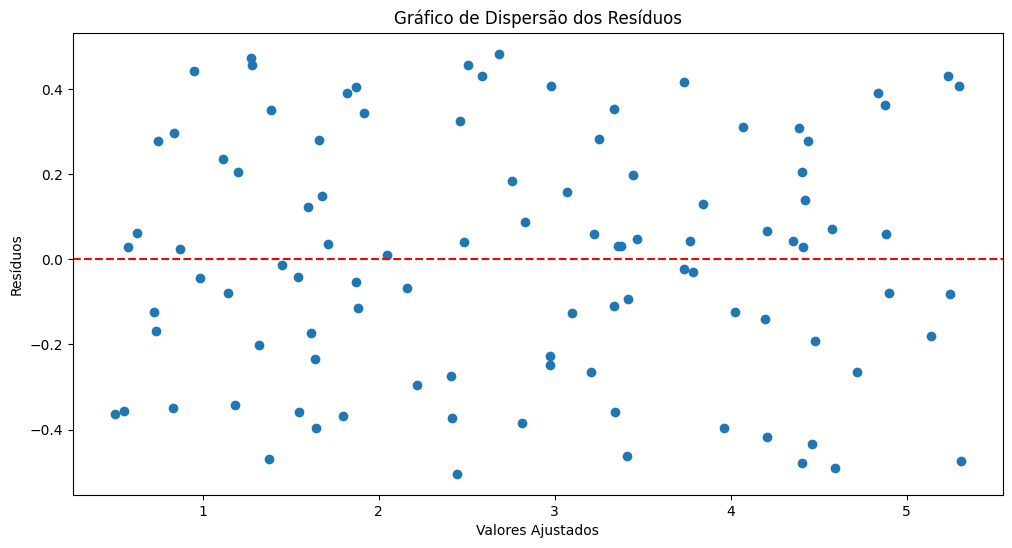

In [161]:
plt.figure(figsize=(12, 6))
plt.scatter(modelo.fittedvalues, modelo.resid)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Gráfico de Dispersão dos Resíduos")

O resultado da regressão apresenta um alto p valor para X1 e X2, indicando que elas não possuem significancia no modelo. As estimativas dos parâmetros não tem validade porque sabemos que existe Multicolinearidade.

#### III - Calcule a matriz de correlação entre X1 e X2. Observe a presença de alta correlação entre as variáveis independentes? Isso sugere multicolinearidade?

In [162]:
matriz_corr = data[['X1', 'X2']].corr()
print(matriz_corr)

          X1        X2
X1  1.000000  0.999769
X2  0.999769  1.000000


Sim, existe uma alta relação entre X1 e X2, indicando Multicolinearidade.

#### IV - Execute um teste de Variance Inflation Factor (VIF) para verificar a presença de multicolinearidade.

In [163]:
vif = pd.DataFrame()
vif["Variável"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

  Variável          VIF
0    const     6.321823
1       X1  2164.384354
2       X2  2164.384354


Tivemos VIFs maiores que 5, indicando Multicolinearidade.

----

### 2 - Efeitos da Multicolinearidade


#### I - Use o mesmo conjunto de dados do Exercício 1. (ACIMA)
#### II - Ajuste o modelo de regressão linear com multicolinearidade. (ACIMA)


#### III - Analise os coeficientes estimados. Como a multicolinearidade afeta os coeficientes de regressão e seus intervalos de confiança?

O resultado da regressão apresenta um alto p valor para X1 e X2, indicando que elas não possuem significancia no modelo. As estimativas dos parâmetros não tem validade porque sabemos que existe Multicolinearidade.

In [164]:
# Intervalo de confiança
IC = modelo.conf_int()
print(IC)

               0          1
const   0.363311   0.649139
X1     -4.007652  15.009380
X2    -19.986112  18.015425


Como podemos ver, o intervalo de confiança de X1 e X2 são grandes demais, por conta da Multicolinearidade.

#### IV - Avalie o ajuste do modelo. Os valores de R-quadrado ajustado e a significância dos coeficientes são afetados pela multicolinearidade?

In [165]:
r_2 = modelo.rsquared
print(f"R²: {r_2}")

R²: 0.9606001112752837


A multicolinearidade pode aumentar o R² ajustado, devido à inclusão de variáveis correlacionadas, mesmo que elas não sejam necessariamente úteis para prever a variável dependente. No nosso modelo ele está maior que 0.9. Isso pode ser enganoso, pois o modelo pode parecer melhor do que realmente é, o contrário também pode acontecer. Sabemos que por conta da Multicolinearidade os coeficientes não são confiáveis.

In [166]:
p_values = modelo.pvalues
print("p - values (Significância dos Coeficientes):")
print(p_values)

p - values (Significância dos Coeficientes):
const    2.892689e-10
X1       2.537091e-01
X2       9.182358e-01
dtype: float64


Ambos os valores são maiores que 0.05, indicando que X1 e X2 não são significantes.

A significância dos coeficientes pode ser afetada, devido à interdependência das variáveis independentes.

----

### 3 - Soluções para a Multicolinearidade

#### I - Aplique uma técnica de lidar com a multicolinearidade, como a eliminação de uma das variáveis independentes altamente correlacionadas.

In [167]:
# Ajustando o modelo de regressão retirando uma das variáveis
X = data[['X2']]
X = sm.add_constant(X)  # Adiciona uma constante (intercepto)
Y = data.Y

#### II - Ajuste o modelo de regressão linear revisado após a eliminação da variável.

In [168]:
modelo = sm.OLS(Y, X).fit()

# Exibindo os resultados do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     2356.
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           2.40e-70
Time:                        21:11:07   Log-Likelihood:                -16.005
No. Observations:                 100   AIC:                             36.01
Df Residuals:                      98   BIC:                             41.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4545      0.056      8.078      0.0

Text(0.5, 1.0, 'Gráfico de Dispersão dos Resíduos')

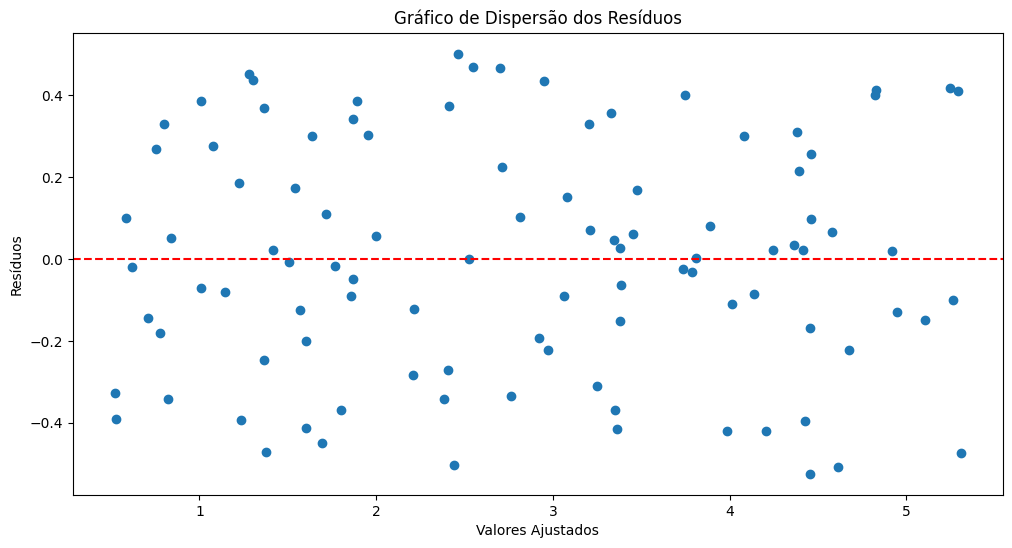

In [169]:
plt.figure(figsize=(12, 6))
plt.scatter(modelo.fittedvalues, modelo.resid)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Gráfico de Dispersão dos Resíduos")

In [170]:
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(modelo.resid, X)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, bp_test))

[('LM Statistic', 0.03859618969779266), ('LM-Test p-value', 0.8442508189356848), ('F-Statistic', 0.03783887026598035), ('F-Test p-value', 0.846169726836986)]


#### III - Compare os resultados do novo modelo com o modelo original em termos de coeficientes e medidas de ajuste (R-quadrado ajustado, erro padrão).

Após a eliminação de uma variável, os coeficientes no novo modelo agora podem ser confiáveis.

O R² ajustado no novo modelo pode aumentar, diminuir ou permanecer inalterado. Nesse caso ele diminuiu apenas 0.001.

o erro padrão diminuiu após a eliminação, tornando as estimativa do coeficiente mais precisa.

#### IV - Comente sobre como a eliminação de variáveis ou outras técnicas afetou o modelo e seus resultados.

Basicamente meu R² continuou alto, o que é positivo.

O intervalo de confiança de X2 ficou bem estreio, causando uma boa estabilidade do modelo.

Visualmente os resíduos parecem ser constantes ao longo dos valores ajustados, indicando um comportamento de homocedasticidade, se confirmando com o Teste de Breusch-Pagan